After a lot of research and letting ideas go, I settled on the Loan Prediction Problem

https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

My first choice was to attempt to predict the next big video game trend on youtube for content creators, but I was unable to find a dataset that I could use. If I could find this data, I would prefer to attempt that challenge (I couldn't figure out how to use the data from the Google YouTube 8M, and it looks like it's 31 GBs)

https://research.google.com/youtube8m/

Purpose of Project
---

Using provided data, create a Predictive Model to determine loan approval or denial.

Step 1:

Import and clean data.

In [ ]:
#Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import cleaning and exploratory mods
#Read in data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

ltrain_df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/My Projects/Loan_Train.csv', index_col='Loan_ID')

ltrain_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Check data for dtype and nulls in loantrain_df

In [ ]:
ltrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [ ]:
ltrain_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


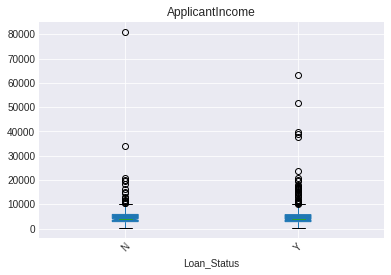

In [ ]:
ltrain_df.boxplot(column = ['ApplicantIncome'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

Applicant Income outliers over 30k to be dropped.

In [ ]:
ltrain_df = ltrain_df[ltrain_df.ApplicantIncome <= 30000]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


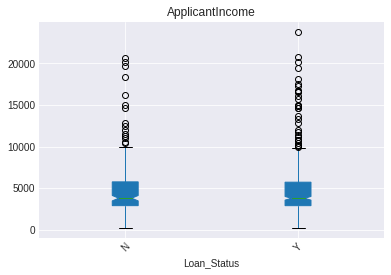

In [ ]:
ltrain_df.boxplot(column = ['ApplicantIncome'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


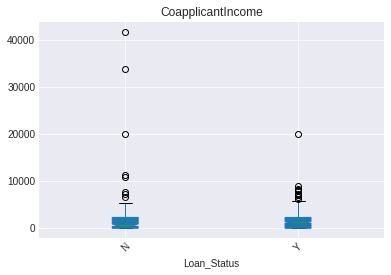

In [ ]:
ltrain_df.boxplot(column = ['CoapplicantIncome'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

In [ ]:
ltrain_df = ltrain_df[ltrain_df.CoapplicantIncome < 10000]

Dropping Coappliacte Income to below 20k

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


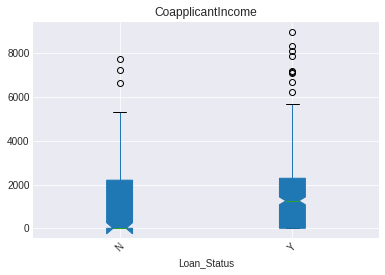

In [ ]:
ltrain_df.boxplot(column = ['CoapplicantIncome'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


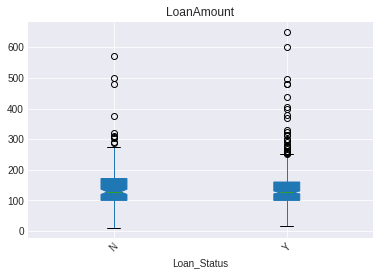

In [ ]:
ltrain_df.boxplot(column = ['LoanAmount'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

In [ ]:
ltrain_df = ltrain_df[ltrain_df.LoanAmount > 100]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


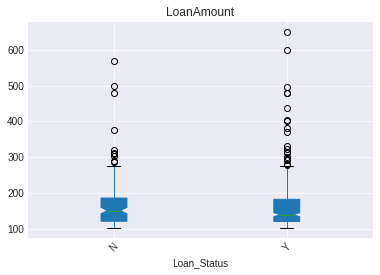

In [ ]:
ltrain_df.boxplot(column = ['LoanAmount'], by='Loan_Status', notch = True, patch_artist = True)
plt.suptitle('')
plt.xticks(rotation = 45);

In [ ]:
ltrain_df.duplicated().any()

False

In [ ]:
ltrain_df['Gender'].value_counts()

Male      347
Female     69
Name: Gender, dtype: int64

In [ ]:
#Replaced Nulls with majority value
ltrain_df['Gender'].fillna(value = 'Male', inplace = True)
ltrain_df['Gender'].value_counts()

Male      357
Female     69
Name: Gender, dtype: int64

In [ ]:
ltrain_df['Married'].value_counts()

Yes    294
No     130
Name: Married, dtype: int64

In [ ]:
#Replaced Nulls with No
ltrain_df['Married'].fillna(value = 'No', inplace = True)
ltrain_df['Married'].value_counts()

Yes    294
No     132
Name: Married, dtype: int64

In [ ]:
ltrain_df['Dependents'].value_counts()

0     234
2      78
1      73
3+     31
Name: Dependents, dtype: int64

In [ ]:
#Replaced Nulls with 0
ltrain_df['Dependents'].fillna(value = '0', inplace = True)
ltrain_df['Dependents'].value_counts()

0     244
2      78
1      73
3+     31
Name: Dependents, dtype: int64

In [ ]:
ltrain_df['Education'].value_counts()

Graduate        340
Not Graduate     86
Name: Education, dtype: int64

In [ ]:
ltrain_df['Self_Employed'].value_counts()

No     343
Yes     60
Name: Self_Employed, dtype: int64

In [ ]:
#Replaced Nulls with No
ltrain_df['Self_Employed'].fillna(value = 'No', inplace = True)
ltrain_df['Self_Employed'].value_counts()

No     366
Yes     60
Name: Self_Employed, dtype: int64

In [ ]:
ltrain_df['Property_Area'].value_counts()

Semiurban    161
Rural        144
Urban        121
Name: Property_Area, dtype: int64

In [ ]:
ltrain_df['Loan_Status'].value_counts()

Y    298
N    128
Name: Loan_Status, dtype: int64

In [ ]:
ltrain_df['Loan_Amount_Term'].value_counts()

360.0    366
180.0     27
480.0     10
300.0      6
84.0       4
60.0       2
240.0      1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
#Replaced Nulls with majority value
ltrain_df['Loan_Amount_Term'].fillna(value = 360, inplace = True)
ltrain_df['Loan_Amount_Term'].value_counts()

360.0    374
180.0     27
480.0     10
300.0      6
84.0       4
60.0       2
240.0      1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
ltrain_df['Credit_History'].value_counts()

1.0    328
0.0     64
Name: Credit_History, dtype: int64

In [ ]:
#Replaced Nulls with 0
ltrain_df['Credit_History'].fillna(value = 0, inplace = True)
ltrain_df['Credit_History'].value_counts()

1.0    328
0.0     98
Name: Credit_History, dtype: int64

In [ ]:
ltrain_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Step 2:

Examine and Visualize Data

The percentage of Yes :  69.95 %
The percentage of No :  30.049999999999997 %


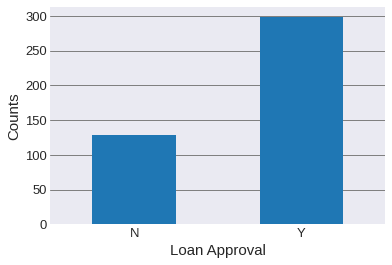

In [ ]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Loan_Status'])[['Loan_Status']].count().plot(kind = "bar", legend = False)
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('')
plt.ylabel('Counts', fontsize = 15)
plt.xlabel('Loan Approval', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13);


print('The percentage of Yes : ', round((ltrain_df['Loan_Status'].value_counts(normalize = True)[0]), 4)*100, '%')
print('The percentage of No : ', round((ltrain_df['Loan_Status'].value_counts(normalize = True)[1]), 4)*100, '%');

~70% of loans are approved

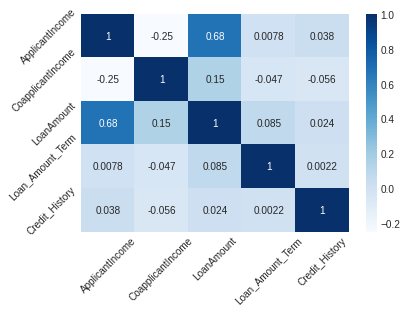

In [ ]:
#Correlations in data
corr = ltrain_df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45);

The only 2 columns that have a strong correlation are Loan Amount and Applicant Income

Those with a Credit history had a much greater chance of having their loan approved.

The percentage of Females approved :  67.0 %
The percentage of Females not approved :  33.0 %
The percentage of Males approved :  71.0 %
The percentage of Males not approved :  28.999999999999996 %


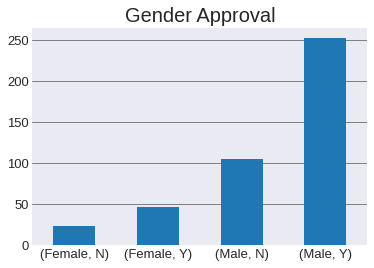

In [ ]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Gender', 'Loan_Status'])[['Loan_Status']].count().plot(kind = "bar", legend = False)
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('Gender Approval', fontsize = 20)
plt.ylabel('', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13);

female = ltrain_df['Gender'] == 'Female'
male = ltrain_df['Gender'] == 'Male'
f_df = ltrain_df[female]
m_df = ltrain_df[male]

print('The percentage of Females approved : ', round((f_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Females not approved : ', round((f_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%')
print('The percentage of Males approved : ', round((m_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Males not approved : ', round((m_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%');

Step 3: Preprocessing

In [ ]:
ltrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, LP001003 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             426 non-null    object 
 1   Married            426 non-null    object 
 2   Dependents         426 non-null    object 
 3   Education          426 non-null    object 
 4   Self_Employed      426 non-null    object 
 5   ApplicantIncome    426 non-null    int64  
 6   CoapplicantIncome  426 non-null    float64
 7   LoanAmount         426 non-null    float64
 8   Loan_Amount_Term   426 non-null    float64
 9   Credit_History     426 non-null    float64
 10  Property_Area      426 non-null    object 
 11  Loan_Status        426 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 43.3+ KB


In [ ]:
ltr_df = pd.get_dummies(ltrain_df, columns= ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first= True)

In [ ]:
dep = {'0' : 0, '1': 1, '2': 2, '3+': 3}
ltr_df['Dependents'] = ltr_df['Dependents'].map(dep)
ltr_df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,
LP001003,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
LP001008,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1
LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,1,1,0,1,0,1
LP001014,3,3036,2504.0,158.0,360.0,0.0,N,1,1,0,0,1,0


In [ ]:
y = ltr_df['Loan_Status'] #Target
X = ltr_df.drop(columns= 'Loan_Status') #Features

In [ ]:
#Train Test Split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(319, 12)

In [ ]:
#Reduce feature count to 95% varience
pca = PCA(n_components = .95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Step 4: Baseline Model Testing

In [ ]:
y.value_counts(normalize= True)
#Baseline prediction is 70% accurate. 

Y    0.699531
N    0.300469
Name: Loan_Status, dtype: float64

Begin Modeling Default Tuning

In [ ]:
#K Nearest Neighbors
#Accuracy 72%

knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

print('Training accuracy:', knn.score(X_train_pca, y_train))
print('Testing accuracy:', knn.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, knn.predict(X_test_pca)))

Training accuracy: 0.7899686520376176
Testing accuracy: 0.719626168224299
Classification Report:                precision    recall  f1-score   support

           N       0.68      0.35      0.46        37
           Y       0.73      0.91      0.81        70

    accuracy                           0.72       107
   macro avg       0.71      0.63      0.64       107
weighted avg       0.71      0.72      0.69       107



In [ ]:
#Random Forest Classifier
#Accuracy 77%

rfc = RandomForestClassifier()
rfc.fit(X_train_pca, y_train)

print('Training accuracy:', rfc.score(X_train_pca, y_train))
print('Testing accuracy:', rfc.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, rfc.predict(X_test_pca)))

Training accuracy: 1.0
Testing accuracy: 0.7850467289719626
Classification Report:                precision    recall  f1-score   support

           N       0.85      0.46      0.60        37
           Y       0.77      0.96      0.85        70

    accuracy                           0.79       107
   macro avg       0.81      0.71      0.72       107
weighted avg       0.80      0.79      0.76       107



In [ ]:
#Logistic Regression
#Accuracy 77%

lrg = LogisticRegression()
lrg.fit(X_train_pca, y_train)

print('Training accuracy:', lrg.score(X_train_pca, y_train))
print('Testing accuracy:', lrg.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, lrg.predict(X_test_pca)))

Training accuracy: 0.7962382445141066
Testing accuracy: 0.7663551401869159
Classification Report:                precision    recall  f1-score   support

           N       0.80      0.43      0.56        37
           Y       0.76      0.94      0.84        70

    accuracy                           0.77       107
   macro avg       0.78      0.69      0.70       107
weighted avg       0.77      0.77      0.74       107



In [ ]:
#AdaBoost Classifier
#Accuracy 72%

ada = AdaBoostClassifier()
ada.fit(X_train_pca, y_train)

print('Training accuracy:', ada.score(X_train_pca, y_train))
print('Testing accuracy:', ada.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, ada.predict(X_test_pca)))

Training accuracy: 0.8808777429467085
Testing accuracy: 0.719626168224299
Classification Report:                precision    recall  f1-score   support

           N       0.67      0.38      0.48        37
           Y       0.73      0.90      0.81        70

    accuracy                           0.72       107
   macro avg       0.70      0.64      0.65       107
weighted avg       0.71      0.72      0.70       107



In [ ]:
#Gradient Boosting Classifier
#Accuracy 78%

gbc = GradientBoostingClassifier()
gbc.fit(X_train_pca, y_train)

print('Training accuracy:', gbc.score(X_train_pca, y_train))
print('Testing accuracy:', gbc.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, gbc.predict(X_test_pca)))

Training accuracy: 0.9623824451410659
Testing accuracy: 0.7757009345794392
Classification Report:                precision    recall  f1-score   support

           N       0.81      0.46      0.59        37
           Y       0.77      0.94      0.85        70

    accuracy                           0.78       107
   macro avg       0.79      0.70      0.72       107
weighted avg       0.78      0.78      0.76       107



In [ ]:
#XGBoost Classifier
#Accuracy 76%

xgb = XGBClassifier()
xgb.fit(X_train_pca, y_train)

print('Training accuracy:', xgb.score(X_train_pca, y_train))
print('Testing accuracy:', xgb.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, xgb.predict(X_test_pca)))

Training accuracy: 0.9435736677115988
Testing accuracy: 0.7570093457943925
Classification Report:                precision    recall  f1-score   support

           N       0.82      0.38      0.52        37
           Y       0.74      0.96      0.84        70

    accuracy                           0.76       107
   macro avg       0.78      0.67      0.68       107
weighted avg       0.77      0.76      0.73       107



In [ ]:
#LGBModel Classifier
#Accuracy 72%

lgb = LGBMClassifier()
lgb.fit(X_train_pca, y_train)

print('Training accuracy:', lgb.score(X_train_pca, y_train))
print('Testing accuracy:', lgb.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, lgb.predict(X_test_pca)))

Training accuracy: 1.0
Testing accuracy: 0.719626168224299
Classification Report:                precision    recall  f1-score   support

           N       0.67      0.38      0.48        37
           Y       0.73      0.90      0.81        70

    accuracy                           0.72       107
   macro avg       0.70      0.64      0.65       107
weighted avg       0.71      0.72      0.70       107



All models have slightly higher baseline prediction over initial baseline.

Choosing 4 models to tune based on untuned accuracy

*   XGBoost
*   Gradient Boosting
*   Logistic Regression
*   Random Forest





In [ ]:
#Random Forest Parameters
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

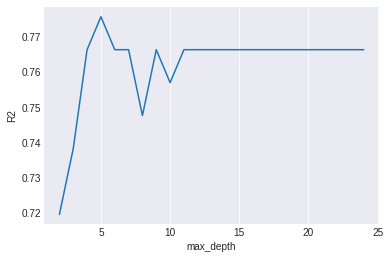

In [ ]:
#Test for Max Depth
max_depth_range = list(range(2, 25)) 

r2 = []
for depth in max_depth_range:
    rfc = RandomForestClassifier(max_depth = depth, random_state = 42)
    rfc.fit(X_train_pca, y_train)

    score = rfc.score(X_test_pca, y_test)
    
    r2.append(score);

plt.plot(max_depth_range, r2)
plt.grid(axis = 'x')
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
#Random Forest tuning with GridSearchCV

rfc_param_grid = {'n_estimators': [100, 150, 200, 250, 300],
                  'max_depth' : [5, 9, 12, 14, 15]}

grid = GridSearchCV(rfc, rfc_param_grid)

grid.fit(X_train_pca, y_train)
print(grid.best_params_)
print(grid.score(X_test_pca, y_test))


{'max_depth': 5, 'n_estimators': 100}
0.7757009345794392


In [ ]:
#Tuned Random Forest Classifier
#Accuracy 78% (2% improvement)

tuned_rfc = RandomForestClassifier(max_depth= 5, n_estimators= 100)
tuned_rfc.fit(X_train_pca, y_train)

print('Training accuracy:', tuned_rfc.score(X_train_pca, y_train))
print('Testing accuracy:', tuned_rfc.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, tuned_rfc.predict(X_test_pca)))

Training accuracy: 0.8934169278996865
Testing accuracy: 0.7570093457943925
Classification Report:                precision    recall  f1-score   support

           N       0.87      0.35      0.50        37
           Y       0.74      0.97      0.84        70

    accuracy                           0.76       107
   macro avg       0.80      0.66      0.67       107
weighted avg       0.78      0.76      0.72       107



In [ ]:
lrg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [ ]:
#Logistic Regression tuning with GridSearchCV

lrg_param_grid = {'max_iter' : [50, 100, 150, 200, 300],
                  'penalty' : ['none', 'l2']}

grid = GridSearchCV(lrg, lrg_param_grid)

grid.fit(X_train_pca, y_train)
print(grid.best_params_)
print(grid.score(X_test_pca, y_test))

{'max_iter': 50, 'penalty': 'none'}
0.7663551401869159


In [ ]:
#Tuned Logistic Regression
#Accuracy 77% (Same as untuned)

tuned_lrg = LogisticRegression(max_iter= 50, penalty = 'none')
tuned_lrg.fit(X_train_pca, y_train)

print('Training accuracy:', tuned_lrg.score(X_train_pca, y_train))
print('Testing accuracy:', tuned_lrg.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, tuned_lrg.predict(X_test_pca)))

Training accuracy: 0.7962382445141066
Testing accuracy: 0.7663551401869159
Classification Report:                precision    recall  f1-score   support

           N       0.80      0.43      0.56        37
           Y       0.76      0.94      0.84        70

    accuracy                           0.77       107
   macro avg       0.78      0.69      0.70       107
weighted avg       0.77      0.77      0.74       107



In [ ]:
gbc.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

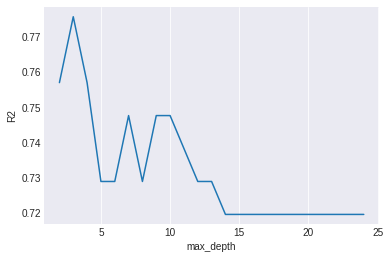

In [ ]:
#Test for Max Depth
max_depth_range = list(range(2, 25)) 

r2 = []
for depth in max_depth_range:
    gbc = GradientBoostingClassifier(max_depth = depth, random_state = 42)
    gbc.fit(X_train_pca, y_train)

    score = gbc.score(X_test_pca, y_test)
    
    r2.append(score);

plt.plot(max_depth_range, r2)
plt.grid(axis = 'x')
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
#Gradient Boosting tuning with GridSearchCV

gbc_param_grid = {'max_depth' : [3,4,5,6,8,10],
                  'n_estimators' : [50, 100, 150, 200, 300]}

grid = GridSearchCV(gbc, gbc_param_grid)

grid.fit(X_train_pca, y_train)
print(grid.best_params_)
print(grid.score(X_test_pca, y_test))

{'max_depth': 3, 'n_estimators': 50}
0.7757009345794392


In [ ]:
#Tuned Gradient Boosting Classifier
#Accuracy 78%

tuned_gbc = GradientBoostingClassifier(max_depth= 3, n_estimators= 50)
tuned_gbc.fit(X_train_pca, y_train)

print('Training accuracy:', tuned_gbc.score(X_train_pca, y_train))
print('Testing accuracy:', tuned_gbc.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, tuned_gbc.predict(X_test_pca)))

Training accuracy: 0.9184952978056427
Testing accuracy: 0.7757009345794392
Classification Report:                precision    recall  f1-score   support

           N       0.84      0.43      0.57        37
           Y       0.76      0.96      0.85        70

    accuracy                           0.78       107
   macro avg       0.80      0.69      0.71       107
weighted avg       0.79      0.78      0.75       107



In [ ]:
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

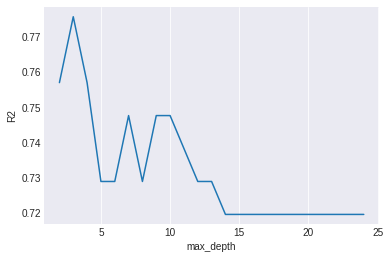

In [ ]:
#Test for Max Depth
max_depth_range = list(range(2, 25)) 

r2 = []
for depth in max_depth_range:
    xgb = GradientBoostingClassifier(max_depth = depth, random_state = 42)
    xgb.fit(X_train_pca, y_train)

    score = xgb.score(X_test_pca, y_test)
    
    r2.append(score);

plt.plot(max_depth_range, r2)
plt.grid(axis = 'x')
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
#XGBoosting tuning with GridSearchCV

xgb_param_grid = {'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15],
                  'n_estimators' : [50, 100, 150, 200, 300, 500]}

grid = GridSearchCV(xgb, xgb_param_grid)

grid.fit(X_train_pca, y_train)
print(grid.best_params_)
print(grid.score(X_test_pca, y_test))

{'max_depth': 3, 'n_estimators': 50}
0.7757009345794392


In [ ]:
#Tuned XGBoosting Classifier
#Accuracy 76%

tuned_xgb = XGBClassifier(max_depth= 3, n_estimators= 50)
tuned_xgb.fit(X_train_pca, y_train)

print('Training accuracy:', tuned_xgb.score(X_train_pca, y_train))
print('Testing accuracy:', tuned_xgb.score(X_test_pca, y_test))
print('Classification Report: ', classification_report(y_test, tuned_xgb.predict(X_test_pca)))

Training accuracy: 0.8871473354231975
Testing accuracy: 0.7570093457943925
Classification Report:                precision    recall  f1-score   support

           N       0.82      0.38      0.52        37
           Y       0.74      0.96      0.84        70

    accuracy                           0.76       107
   macro avg       0.78      0.67      0.68       107
weighted avg       0.77      0.76      0.73       107



In [ ]:
#Voting Classifier using the 4 tuned models above
#75% acurracy

estimators = [('tuned_rfc',rfc), ('tuned_lrg',lrg), ('tuned_gbc',gbc), ('tuned_xgb',xgb)]

vote_clr = VotingClassifier(estimators=estimators)
vote = vote_clr.fit(X_train_pca, y_train)

print('Training accuracy:', vote.score(X_train_pca, y_train))
print('Testing accuracy:', vote.score(X_test_pca, y_test))
print('Classification Report:', classification_report(y_test, vote.predict(X_test_pca)))

Training accuracy: 1.0
Testing accuracy: 0.7476635514018691
Classification Report:               precision    recall  f1-score   support

           N       0.69      0.49      0.57        37
           Y       0.77      0.89      0.82        70

    accuracy                           0.75       107
   macro avg       0.73      0.69      0.70       107
weighted avg       0.74      0.75      0.73       107



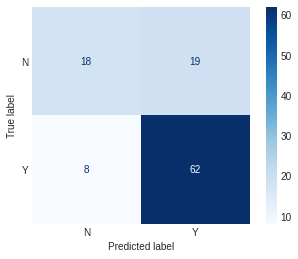

In [ ]:
#Confusion Matrix to better understand results
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(vote, X_test_pca, y_test, cmap = 'Blues');

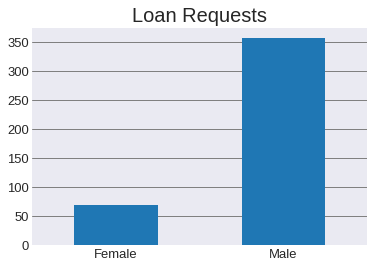

In [ ]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Gender'])[['Loan_Status']].count().plot(kind = "bar", legend = False)
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('Loan Requests', fontsize = 20)
plt.ylabel('', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13);

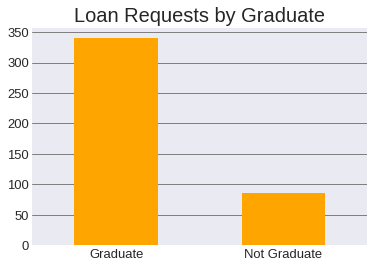

In [ ]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Education'])[['Loan_Status']].count().plot(kind = "bar", legend = False, color = 'orange')
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('Loan Requests by Graduate', fontsize = 20)
plt.ylabel('', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13);

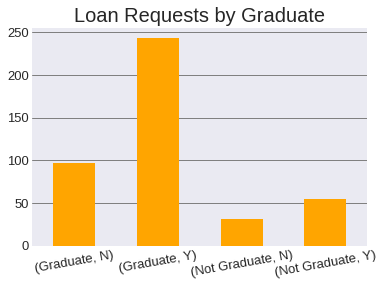

In [ ]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Education', 'Loan_Status'])[['Loan_Status']].count().plot(kind = "bar", legend = False, color = 'orange')
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('Loan Requests by Graduate', fontsize = 20)
plt.ylabel('', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation = 10, fontsize = 13)
plt.yticks(fontsize = 13);

In [ ]:
grad = ltrain_df['Education'] == 'Graduate'
non_grad = ltrain_df['Education'] == 'Not Graduate'
g_df = ltrain_df[grad]
ng_df = ltrain_df[non_grad]

print('The percentage of Graduate approved : ', round((g_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Graduate not approved : ', round((g_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%')
print('The percentage of Non-Graduate approved : ', round((ng_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Non-Graduate not approved : ', round((ng_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%');

The percentage of Graduate approved :  71.0 %
The percentage of Graduate not approved :  28.999999999999996 %
The percentage of Non-Graduate approved :  64.0 %
The percentage of Non-Graduate not approved :  36.0 %


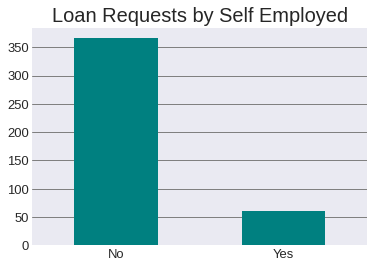

In [ ]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Self_Employed'])[['Loan_Status']].count().plot(kind = "bar", legend = False, color = 'teal')
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('Loan Requests by Self Employed', fontsize = 20)
plt.ylabel('', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13);

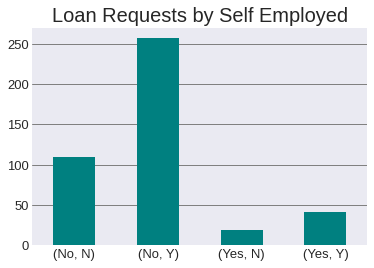

In [ ]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Self_Employed', 'Loan_Status'])[['Loan_Status']].count().plot(kind = "bar", legend = False, color = 'teal')
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('Loan Requests by Self Employed', fontsize = 20)
plt.ylabel('', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13);

In [ ]:
slf_emp = ltrain_df['Self_Employed'] == 'Yes'
n_slf_emp = ltrain_df['Self_Employed'] == 'No'
se_df = ltrain_df[slf_emp]
nse_df = ltrain_df[n_slf_emp]

print('The percentage of Self_Employed approved : ', round((se_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Self_Employed not approved : ', round((se_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%')
print('The percentage of Not Self_Employed approved : ', round((nse_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Not Self_Employed not approved : ', round((nse_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%');

The percentage of Self_Employed approved :  68.0 %
The percentage of Self_Employed not approved :  32.0 %
The percentage of Not Self_Employed approved :  70.0 %
The percentage of Not Self_Employed not approved :  30.0 %


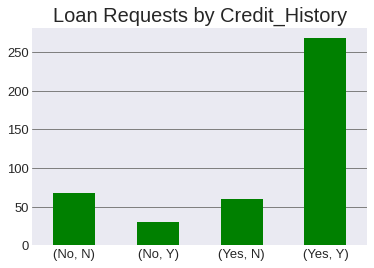

In [ ]:
plt.style.use('seaborn-dark')

cred_hist_df = ltrain_df
cred_hist_df['Credit_History'] = cred_hist_df['Credit_History'].replace([0.0],'No')
cred_hist_df['Credit_History'] = cred_hist_df['Credit_History'].replace([1.0],'Yes')

cred_hist_df.groupby(['Credit_History','Loan_Status'])[['Loan_Status']].count().plot(kind = "bar", legend = False, color = 'green')
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('Loan Requests by Credit_History', fontsize = 20)
plt.ylabel('', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13);

In [ ]:
ch = cred_hist_df['Credit_History'] == 'Yes'
n_ch = cred_hist_df['Credit_History'] == 'No'
ch_df = cred_hist_df[ch]
nch_df = cred_hist_df[n_ch]

print('The percentage of Credit History approved : ', round((ch_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Credit History not approved : ', round((ch_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%')
print('The percentage of No Credit History approved : ', round((nch_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of No Credit History not approved : ', round((nch_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%');

The percentage of Credit History approved :  82.0 %
The percentage of Credit History not approved :  18.0 %
The percentage of No Credit History approved :  69.0 %
The percentage of No Credit History not approved :  31.0 %


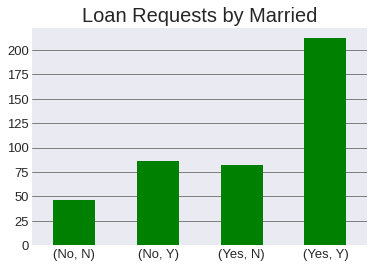

In [ ]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Married','Loan_Status'])[['Loan_Status']].count().plot(kind = "bar", legend = False, color = 'green')
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('Loan Requests by Married', fontsize = 20)
plt.ylabel('', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13);

In [ ]:
m = ltrain_df['Married'] == 'Yes'
n_m = ltrain_df['Married'] == 'No'
ma_df = ltrain_df[m]
nma_df = ltrain_df[n_m]

print('The percentage of Married approved : ', round((ma_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Married not approved : ', round((ma_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%')
print('The percentage of No Married approved : ', round((nma_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of No Married not approved : ', round((nma_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%');

The percentage of Married approved :  72.0 %
The percentage of Married not approved :  28.000000000000004 %
The percentage of No Married approved :  65.0 %
The percentage of No Married not approved :  35.0 %


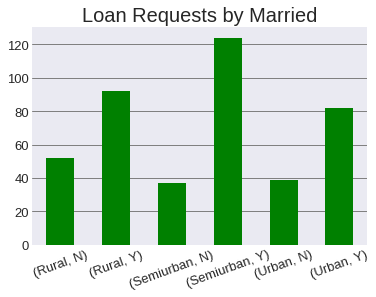

In [ ]:
plt.style.use('seaborn-dark')

ltrain_df.groupby(['Property_Area','Loan_Status'])[['Loan_Status']].count().plot(kind = "bar", legend = False, color = 'green')
plt.grid(axis = 'y', c = 'grey', linewidth = 1)
plt.title('Loan Requests by Married', fontsize = 20)
plt.ylabel('', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.xticks(rotation = 20, fontsize = 13)
plt.yticks(fontsize = 13);

In [ ]:
ru = ltrain_df['Property_Area'] == 'Rural'
ur = ltrain_df['Property_Area'] == 'Urban'
sur = ltrain_df['Property_Area'] == 'Semiurban'
ru_df = ltrain_df[ru]
ur_df = ltrain_df[ur]
sur_df = ltrain_df[sur]

print('The percentage of Rural approved : ', round((ru_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Rural History not approved : ', round((ru_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%')
print('The percentage of Urban approved : ', round((ur_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Urban not approved : ', round((ur_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%');
print('The percentage of Semiurban approved : ', round((sur_df['Loan_Status'].value_counts(normalize = True)[0]), 2)*100, '%')
print('The percentage of Semiurban not approved : ', round((sur_df['Loan_Status'].value_counts(normalize = True)[1]), 2)*100, '%');

The percentage of Married approved :  64.0 %
The percentage of Married History not approved :  36.0 %
The percentage of No Married History approved :  68.0 %
The percentage of No Married History not approved :  32.0 %
The percentage of No Married History approved :  77.0 %
The percentage of No Married History not approved :  23.0 %
